<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Relaciones Lineales </font> </center>

In [2]:
from sklearn.datasets import load_wine
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X=np.array([1,2,3])
W=np.array([[1,0,0],[0,0.55,0.3]])
W@X

array([1., 2.])

---
# Relaciones lineales

In [4]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Relación entre `flavanoids` y `ash`

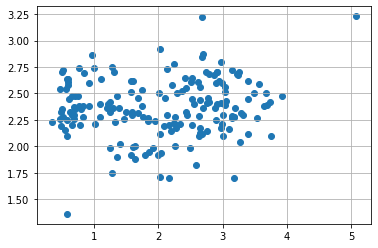

In [5]:
# Gráfica flavanoids vs ash
plt.scatter(df['flavanoids'],df['ash'])
plt.grid()

## Relación entre `alcalinity_of_ash` y `ash`

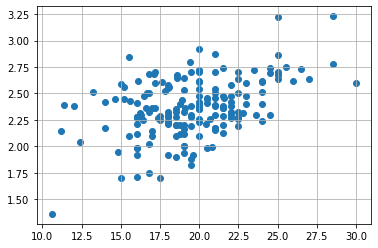

In [6]:
# Gráfica alcalinity_of_ash vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.grid()

Encontrar la mejor función lineal que relacione a las variables

In [7]:
minimize?

In [8]:
# Definimos 'fun', el criterio de minimizacion
#
# ash=a[0]+a[1]*flavanoids
def fun(a,x,y):
  f=a[0]+a[1]*x
  return np.mean((f-y)**2)

In [9]:
a0=np.random.rand(2) # Dos elementos uniformemente distrubuidos entre 0 y 1
sol=minimize(fun,a0,args=(df.flavanoids,df.ash))
sol

      fun: 0.07385068677098965
 hess_inv: array([[ 2.57533477, -1.02270034],
       [-1.02270034,  0.50397459]])
      jac: array([9.31322575e-10, 4.65661287e-09])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.3023781 , 0.03160681])

---
La ecuación óptima que relaciona `flavanoids` y `ash` es 
$$
ash=2.3+0.0316\;flavanoids,
$$
con un $mse=0.07385$.

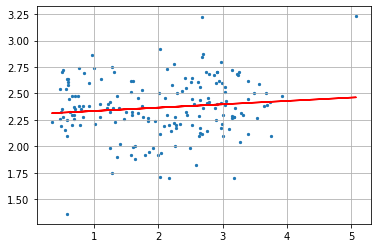

In [10]:
# Flavanoids vs ash
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
x=df.flavanoids
a=sol.x
f=a[0]+a[1]*x
plt.plot(x,f,'r') # 'r'=red
plt.grid() # Cuadrícula de fondo

In [11]:
# Función lineal que relaciona Ash vs su alcalinidad
#
# Usamos la misma función 'fun' (criterio de optimización) y las mismas condiciones iniciales 'a0'
sol2=minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

      fun: 0.060129813645398975
 hess_inv: array([[17.63488642, -0.87894003],
       [-0.87894003,  0.04508554]])
      jac: array([4.65661287e-10, 4.65661287e-10])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([1.6564679 , 0.03642221])

---
La ecuación óptima que relaciona `alcalinity_of_ash` con `ash` es
$$
ash=1.656+0.0364\;alcalinity\_of\_ash,
$$
con un $mse=0.06013$.

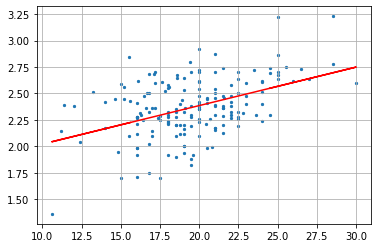

In [12]:
a=sol2.x
x=df.alcalinity_of_ash
f=a[0]+a[1]*x
plt.scatter(x,df.ash,s=5)
plt.plot(x,f,'r')
plt.grid()